# Lecture 2 Demo: Decision Trees

## Imports

```{note} 
If it's not necessary for you to understand the code, I will put it in one of the files under the `code` directory to avoid clutter in this notebook. For example, most of the plotting code is going to be in `code/plotting_functions.py`. 
```

In [1]:
# import the libraries
import os
import sys
sys.path.append(os.path.join("code"))
from plotting_functions import *
from utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

DATA_DIR = os.path.join("data/")
pd.set_option("display.max_colwidth", 200)

## The Dataset

In this demo, we will be working with the Quiz 2 dataset that was introduced in the videos:

> Imagine that you are taking a course with four homework assignments and two quizzes. You and your friends are quite nervous about your `quiz2` grades and you want to know how will you do based on your previous performance and some other attributes. 
> 
> So you decide to collect some data from your friends from last year and train a supervised machine learning model for `quiz2` grade prediction. 

In [2]:
classification_df = pd.read_csv(DATA_DIR + "quiz2-grade-toy-classification.csv")
print(classification_df.shape)
classification_df.head()

(21, 8)


,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+


## Decision trees [[video](https://youtu.be/Hcf19Ij35rA)]

```{seealso}
Check out [the accompanying video](https://youtu.be/Hcf19Ij35rA) on this material. 
```

### Write a traditional program to predict quiz2 grade based on two features

- Forget about ML for a second. Let's simplify the problem considerably and see if we can build some intuition
- Below you will write a small program to predict whether a student gets an A+ or not in quiz2.

Here is a sketch of some steps:
- Let's first make the feature values binary (1 or 0) to make it easier on ourselves.
- Start with two features: `class_attendance` and `quiz1`, see how far you get!
- Look at the data, and see if you can come up with rules that would definitely get an A+ and definitely get not an A+.
- Write those rules down first, then look at edge cases - can you think of a way to resolve Ties?

Hint: if you're having trouble seeing a pattern, your goal is to find a pattern that distinguishes yes's from no's (There may not be a pattern there! What's the next best thing? How about a rule-based algorithm with a number of *if else* statements?)

<img src="img/quiz2-grade-toy.png" width="700">


In [9]:
# We'll help you with some of the data wrangling to get you started

classification_df = pd.read_csv(DATA_DIR + "quiz2-grade-toy-classification.csv")
X = classification_df.drop(columns=["quiz2"])
y = classification_df[["quiz2"]]

X_binary = X.copy()
columns = ["lab1", "lab2", "lab3", "lab4", "quiz1"]
for col in columns:
    X_binary[col] = X_binary[col].apply(lambda x: 1 if x >= 90 else 0)
X_binary.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,1,1,0,1,1
1,1,0,1,1,0,0,1
2,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0
4,0,1,0,0,1,1,0


### Write rules for cases that show a clear pattern

- ...
- ...
- ...

### Write rules for cases that are less clear but still evident

- ...
- ...
- ...

### Cases where the rules don't fit

- ...
- ...
- ...

In [34]:
np.random.choice([1,1,1,1,0])

1

In [35]:
# Here's a starting point for your function:

def traditional_predict(class_attendance: float, quiz1: float) -> str:
    """
    Predicts student performance on quiz2 (A+ or not A+) based on class attendance and quiz1 score.

    Parameters:
        class_attendance (float): The student's attendance rate as a percentage (0 to 100).
        quiz1 (float): The student's score on Quiz 1 (0 to 100).

    Returns:
        str: A prediction category such as "High", "Medium", or "Low" performance.
    """

    pos = "A+"
    neg = "Not A+"
    
    if (class_attendance ==1 and quiz1 == 1):
        return pos
    elif (class_attendance == 1 and quiz1 == 0):
        return np.random.choice([pos,pos,neg])
    else:
        return neg


In [36]:
traditional_predict(0,0)

'Not A+'

**Note How many possible rule combinations could there be with all 7 binary features?**

> Your answer here

### Building decision trees with `sklearn`

In [37]:
# The first step is to make the features binary (this was already done in the wrangling step above)
# Copy the code here just so you get used to the steps.

# Your answer here (as code)

classification_df = pd.read_csv(DATA_DIR + "quiz2-grade-toy-classification.csv")
X = classification_df.drop(columns=["quiz2"])
y = classification_df[["quiz2"]]

X_binary = X.copy()
columns = ["lab1", "lab2", "lab3", "lab4", "quiz1"]
for col in columns:
    X_binary[col] = X_binary[col].apply(lambda x: 1 if x >= 90 else 0)
X_binary.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,1,1,0,1,1
1,1,0,1,1,0,0,1
2,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0
4,0,1,0,0,1,1,0


#### Set up a `DummyClassifier` on `quiz2` grade prediction toy dataset

_Note: Set up the dummy classifier using the 'most_frequent' method as the strategy._

[relevant docs here](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

In [44]:
from sklearn.dummy import DummyClassifier

# Your answer here (in code)
dummy_clf = DummyClassifier(strategy="most_frequent")

In [46]:
#### Call `fit()` on the dummy classifier

# Your answer here (in code)
dummy_clf.fit(X_binary,y)

DummyClassifier(strategy='most_frequent')

In [47]:
#### Call `score()`` on the dummy classifier

# Your answer here (in code)
dummy_clf.score(X_binary,y)

0.5238095238095238

The result of `score()` is how well this Dummy Classifier performs on the data. This will be our "baseline" for comparing more complex models.

#### Set up the `DecisionTreeClassifier` on this toy dataset 

Okay now that we know our baseline, let's set up a `DecisionTreeClassifier`

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Initialize/Instantiate a Decision Tree:
# Your answer here (in code)
model = DecisionTreeClassifier(max_depth=4)

In [71]:
# Run `fit()` on model
# Your answer here (in code)
model.fit(X_binary,y)

DecisionTreeClassifier(max_depth=4)

In [72]:
# Run `score()` on model
# Your answer here (in code)
model.score(X_binary,y)

0.9047619047619048

The decision tree classifier should be giving a much higher accuracy than the dummy classifier. If so, that's good news! 

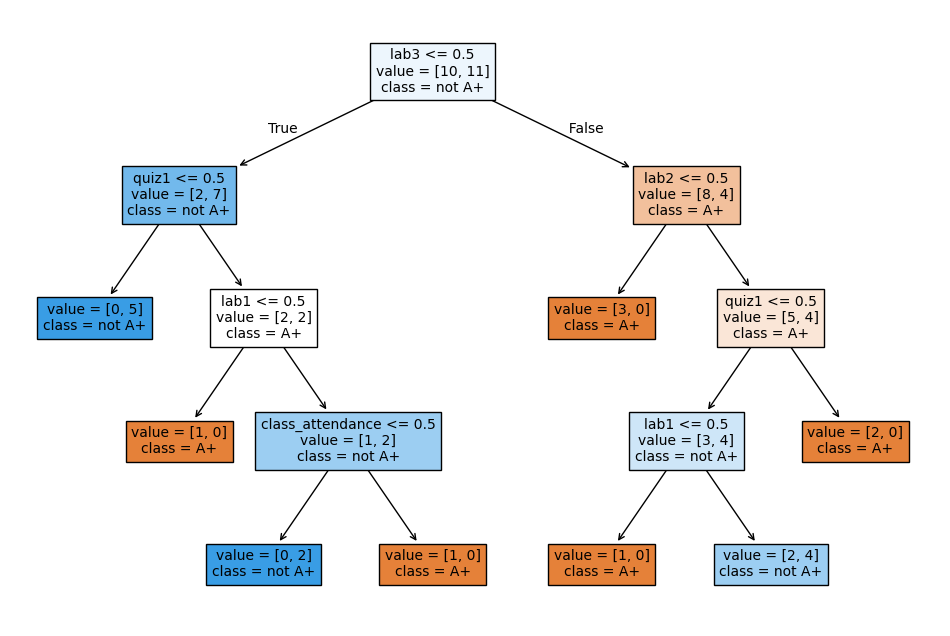

In [73]:
# Call the custom_plot_tree function to visualize the customized tree
# This cell will initially give an error, but when you fill in things correctly above, it will produce a decision tree
width=12 
height = 8
plt.figure(figsize=(width, height))
custom_plot_tree(model, 
                 feature_names=X_binary.columns.tolist(), 
                 class_names=['A+', 'not A+'],
                 impurity=False,
                 fontsize=10,)

### Run `predict()` on a new, unseen example:

In [76]:
# First, generate a new example (unseen data) and let's run our decision tree on it to see what it predicts
# Change the -1s to 1s and 0s:

new_example = np.array([[1, 0, 1, 1, 1, 0, 0]])
pd.DataFrame(data=new_example, columns=X.columns)

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,0,1,1,1,0,0


#### Now, run `predict()` on it

In [77]:
# Your answer here (in code)
model.predict(new_example)

/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['not A+'], dtype=object)

In summary, given a learned tree and a test example, during prediction time,  
- Start at the top of the tree. Ask binary questions at each node and follow the appropriate path in the tree. Once you are at a leaf node, you have the prediction. 
- Note that the model only considers the features which are in the learned tree and ignores all other features. 

### Decision trees with continuous features

Okay now let's ramp things up a bit, instead of working with binarized features, let's see how things look with continuous features:

In [78]:
X.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,92,93,84,91,92
1,1,0,94,90,80,83,91
2,0,0,78,85,83,80,80
3,0,1,91,94,92,91,89
4,0,1,77,83,90,92,85


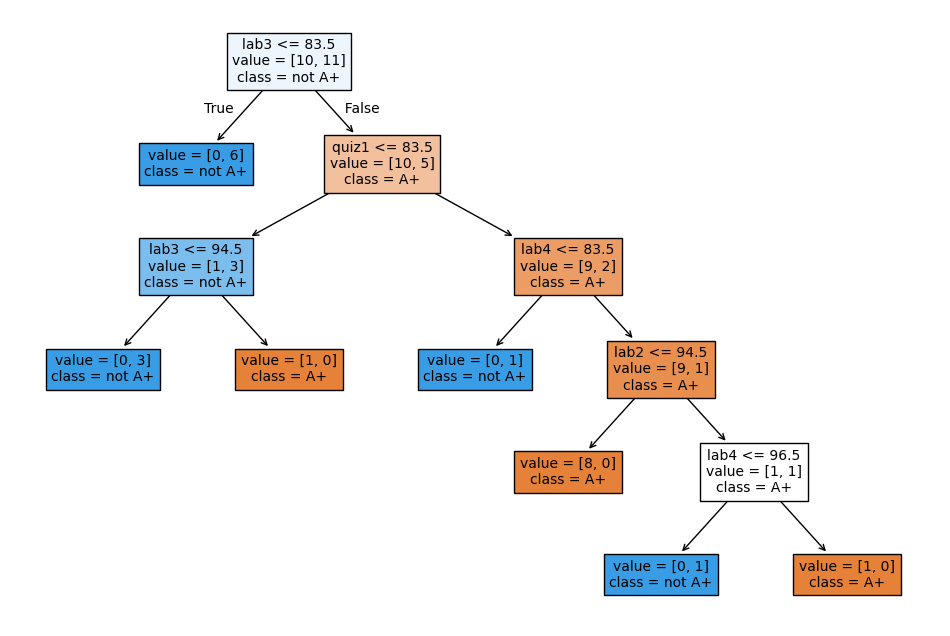

In [79]:
model = DecisionTreeClassifier()
model.fit(X, y)
plt.figure(figsize=(width, height))
custom_plot_tree(model, 
                 feature_names=X_binary.columns.tolist(), 
                 class_names=['A+', 'not A+'],
                 impurity=False,
                 fontsize=10,)

In [80]:
model.score(X,y)

1.0

![](../img/eva-logging-off.png)


That's it! You're finished with today's demo!

## What's next?

Make sure you go through the lecture notes decision trees for regression problems, and play around with some of the hyperparameters (`max_depth` for example).

Then, get started on the next set of pre-lecture videos!